In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
from tqdm import tqdm

In [2]:
pd.options.display.float_format = "{:,.2f}".format

### Generator IDs

In [3]:
gen_id = pd.read_csv('datasets/cleaned/generators_updated.csv', 
            usecols=['Resource Name', 'grid', 'CLASS', 'SUBTYPE', 'TYPE', 'YEARS_COMMISSIONED', 'DATE_COMMISSIONED'])
gen_id['DATE_COMMISSIONED'] = pd.to_datetime(gen_id['DATE_COMMISSIONED'])
gen_id.head()

,Resource Name,grid,CLASS,TYPE,SUBTYPE,DATE_COMMISSIONED,YEARS_COMMISSIONED
0,1ACNPC_G01,LUZON,GRID CONNECTED,BIOMASS,Biogas,2017-07-01,4.00
1,1AMBUK_U01,LUZON,GRID CONNECTED,LARGE HYDROELECTRIC,Dam-type HEPP,1956-12-01,64.00
2,1AMBUK_U02,LUZON,GRID CONNECTED,LARGE HYDROELECTRIC,Dam-type HEPP,1956-12-01,64.00
3,1AMBUK_U03,LUZON,GRID CONNECTED,LARGE HYDROELECTRIC,Dam-type HEPP,1956-12-01,64.00
4,1AMPHAW_G01,LUZON,GRID CONNECTED,SMALL HYDROELECTRIC,Run-of-River type HEPP,1991-08-01,29.00


### Generation Loading Datasets

In [4]:
df = pd.read_csv('datasets/cleaned/MW-ante-post.csv')
df['DATE_TIME'] = pd.to_datetime(df['DATE_TIME'])
df.head()

,DELIVERY_DATE,DELIVERY_HOUR,RESOURCE_NAME,DATE_TIME,MW_ante,PRICE_ante,MW_loading_ante,MW_post,PRICE_post,MW_loading_post
0,2009-12-26,0,1AEC_G01,2009-12-26,0.00,0.00,0.00,0.00,-10.13,0.00
1,2009-12-26,0,1ANGAT_A,2009-12-26,25.00,0.00,138.89,24.30,-10.00,135.00
2,2009-12-26,0,1ANGAT_M,2009-12-26,5.00,0.00,2.50,5.00,-10.00,2.50
3,2009-12-26,0,1APEC_G01,2009-12-26,0.00,0.00,0.00,0.00,-10.13,0.00
4,2009-12-26,0,1BAKUN_G01,2009-12-26,0.80,0.00,1.05,0.80,-10.12,1.05


### Installed Plant Capacity

In [5]:
installed_capacity = pd.read_csv('datasets/cleaned/installed_capacity.csv',
                                usecols=['Resource Name', 'MW_installed'])
installed_capacity.head()

,Resource Name,MW_installed
0,1ACNPC_G01,1.70
1,1AMBUK_U01,35.00
2,1AMBUK_U02,35.00
3,1AMBUK_U03,35.00
4,1AMPHAW_G01,12.50


### Merge Dataframes

In [6]:
datasets = pd.merge(df, gen_id, 
                    left_on='RESOURCE_NAME', 
                    right_on='Resource Name', 
                    how='left').drop('Resource Name', axis=1)

In [7]:
datasets = pd.merge(datasets, installed_capacity, 
                    left_on='RESOURCE_NAME', 
                    right_on='Resource Name',
                    how='left').rename(columns={'MW':'MW_installed'})
display(datasets)

,DELIVERY_DATE,DELIVERY_HOUR,RESOURCE_NAME,DATE_TIME,MW_ante,PRICE_ante,MW_loading_ante,MW_post,PRICE_post,MW_loading_post,grid,CLASS,TYPE,SUBTYPE,DATE_COMMISSIONED,YEARS_COMMISSIONED,Resource Name,MW_installed
0,2009-12-26,0,1AEC_G01,2009-12-26 00:00:00,0.00,0.00,0.00,0.00,-10.13,0.00,NaN,NaN,NaN,NaN,NaT,nan,1AEC_G01,27.50
1,2009-12-26,0,1ANGAT_A,2009-12-26 00:00:00,25.00,0.00,138.89,24.30,-10.00,135.00,LUZON,GRID CONNECTED,LARGE HYDROELECTRIC,Dam-type HEPP,1986-06-01,35.00,1ANGAT_A,18.00
2,2009-12-26,0,1ANGAT_M,2009-12-26 00:00:00,5.00,0.00,2.50,5.00,-10.00,2.50,LUZON,GRID CONNECTED,LARGE HYDROELECTRIC,Dam-type HEPP,1967-10-01,53.00,1ANGAT_M,200.00
3,2009-12-26,0,1APEC_G01,2009-12-26 00:00:00,0.00,0.00,0.00,0.00,-10.13,0.00,LUZON,GRID CONNECTED,COAL,Pulvurized Sub Critical Coal,2006-07-01,15.00,1APEC_G01,52.00
4,2009-12-26,0,1BAKUN_G01,2009-12-26 00:00:00,0.80,0.00,1.05,0.80,-10.12,1.05,LUZON,GRID CONNECTED,LARGE HYDROELECTRIC,Run-of-River type HEPP,2000-11-01,20.00,1BAKUN_G01,76.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22459343,2021-06-25,19,3BACMAN_U03,2021-06-25 19:00:00,19.00,"4,633.86",95.00,19.00,"4,637.31",95.00,LUZON,GRID CONNECTED,GEOTHERMAL,Single Flash,1993-09-01,27.00,3BACMAN_U03,20.00
22459344,2021-06-25,20,3BACMAN_U03,2021-06-25 20:00:00,0.00,"13,556.49",0.00,9.00,"11,316.27",45.00,LUZON,GRID CONNECTED,GEOTHERMAL,Single Flash,1993-09-01,27.00,3BACMAN_U03,20.00
22459345,2021-06-25,21,3BACMAN_U03,2021-06-25 21:00:00,9.00,"8,095.88",45.00,9.00,"7,981.14",45.00,LUZON,GRID CONNECTED,GEOTHERMAL,Single Flash,1993-09-01,27.00,3BACMAN_U03,20.00
22459346,2021-06-25,22,3BACMAN_U03,2021-06-25 22:00:00,19.00,"3,625.97",95.00,19.00,"3,600.83",95.00,LUZON,GRID CONNECTED,GEOTHERMAL,Single Flash,1993-09-01,27.00,3BACMAN_U03,20.00


In [8]:
# datasets[(datasets['RESOURCE_NAME']=='1CONSOL_G01') & (datasets['DELIVERY_HOUR']==13)]

### Filtering

In [9]:
baseloads = ['COAL', 'NATURAL GAS', 'GEOTHERMAL'] #Set all types of plant to be considered
df_baseloads = datasets[datasets['TYPE'].isin(baseloads)].copy()

In [10]:
variables = ['LARGE HYDROELECTRIC', 'DIESEL', 'BIOMASS',
             'WIND', 'SMALL HYDROELECTRIC', 'MINI HYDROELECTRIC',
             'OIL THERMAL', 'MICRO HYDROELECTRIC', 'GAS TURBINE']
df_variables = datasets[datasets['TYPE'].isin(variables)].copy()

In [11]:
solar = ['SOLAR']
df_solar = datasets[datasets['TYPE'].isin(solar)].copy()

In [12]:
def visualize(resource_id):
    datasets[datasets['RESOURCE_NAME']==resource_id][['DATE_TIME', 'MW_post']].set_index(['DATE_TIME']).plot(figsize=(20,6))

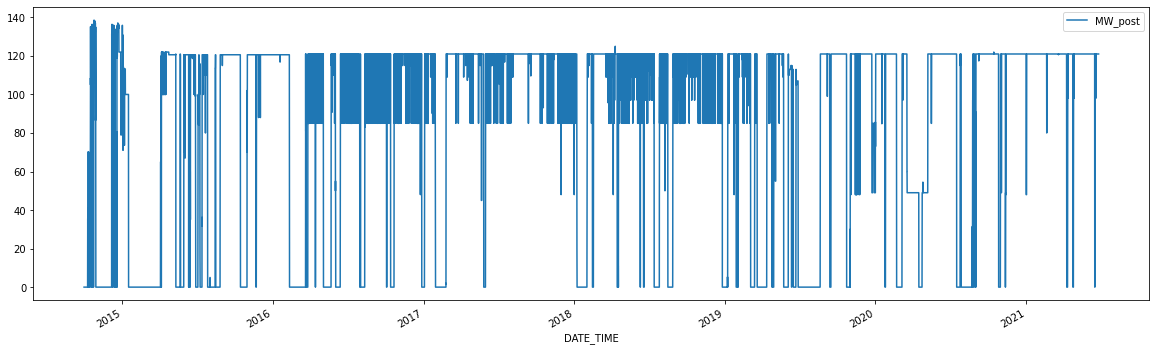

In [13]:
visualize('3SLTEC_G01')

### Removing Commissioning stage data
Based on date commissioned in generators_updated file

In [14]:
df_op = df_baseloads[df_baseloads['DATE_TIME'] >= df_baseloads['DATE_COMMISSIONED']]

In [15]:
#df_op[df_op['RESOURCE_NAME'] == '3SLTEC_G01']

In [16]:
df_op.head()

,DELIVERY_DATE,DELIVERY_HOUR,RESOURCE_NAME,DATE_TIME,MW_ante,PRICE_ante,MW_loading_ante,MW_post,PRICE_post,MW_loading_post,grid,CLASS,TYPE,SUBTYPE,DATE_COMMISSIONED,YEARS_COMMISSIONED,Resource Name,MW_installed
3,2009-12-26,0,1APEC_G01,2009-12-26,0.00,0.00,0.00,0.00,-10.13,0.00,LUZON,GRID CONNECTED,COAL,Pulvurized Sub Critical Coal,2006-07-01,15.00,1APEC_G01,52.00
14,2009-12-26,0,1MSINLO_G01,2009-12-26,0.00,0.00,0.00,0.00,-9.97,0.00,LUZON,GRID CONNECTED,COAL,Pulvurized Sub Critical Coal,1998-06-01,23.00,1MSINLO_G01,315.00
15,2009-12-26,0,1MSINLO_G02,2009-12-26,80.00,0.00,23.26,80.00,-9.96,23.26,LUZON,GRID CONNECTED,COAL,Pulvurized Sub Critical Coal,1998-06-01,23.00,1MSINLO_G02,344.00
22,2009-12-26,0,1SUAL_G01,2009-12-26,225.00,0.00,34.78,225.00,-9.97,34.78,LUZON,GRID CONNECTED,COAL,Pulvurized Sub Critical Coal,1999-10-01,21.00,1SUAL_G01,647.00
23,2009-12-26,0,1SUAL_G02,2009-12-26,0.00,0.00,0.00,0.00,-9.97,0.00,LUZON,GRID CONNECTED,COAL,Pulvurized Sub Critical Coal,1999-10-01,21.00,1SUAL_G02,647.00


### Removing 2-6 week consecutive outage interval for baseloads
Assuming more than 2 or less than 6 week outages are planned

In [17]:
#using this number to remove entries based on consecutive outage count
n_max = 6*7*24
n_min = 2*7*24

baseload_resource = df_baseloads["RESOURCE_NAME"].unique()
baseload_resource

array(['1APEC_G01', '1MSINLO_G01', '1MSINLO_G02', '1SUAL_G01',
       '1SUAL_G02', '3CALACA_G01', '3CALACA_G02', '3ILIJAN_G01',
       '3ILIJAN_G02', '3MKBN_A', '3MKBN_B', '3MKBN_C', '3MKBN_D',
       '3MKBN_E', '3ORMAT_G01', '3PAGBIL_G01', '3PAGBIL_G02', '3QPPL_G01',
       '3STA-RI_G01', '3STA-RI_G02', '3STA-RI_G03', '3STA-RI_G04',
       '3STA-RI_G05', '3STA-RI_G06', '3TIWI_A', '3TIWI_B', '3TIWI_C',
       '4LEYTE_A', '4LGPP_G01', '6PAL1A_G01', '5KSPC_G01', '5TPC_G02',
       '5KSPC_G02', '1MARVEL_G01', '1MARVEL_G02', '1PETRON_G01',
       '3MGPP_G01', '6PAL2A_U01', '6PAL2A_U02', '6PAL2A_U03',
       '6PAL2A_U04', '5CEDC_U01', '5CEDC_U02', '5CEDC_U03', '8PEDC_U01',
       '8PEDC_U02', '6NASULO_G01', '3SLTEC_G01', '3SLTEC_G02',
       '3SLPGC_G01', '3SLPGC_G02', '1ANDA_G01', '3SNGAB_G01', '8PALM_G01',
       '8PEDC_U03', '1SMC_G01', '3AVION_U01', '3AVION_U02', '1UPPC_G01',
       '1SMC_G02', '3PAGBIL_G03', '1SMC_G03', '3MGI_G02', '5THVI_U01',
       '5THVI_U02', '1SMC_G04', '1MSINLO_

In [18]:
df_copy = df_op.copy()
df_copy.loc[:,('OUTAGE_BINARY')] = np.where(df_op['MW_post'] <= 0.5, 1, 0)
df_op = df_copy.copy()
df_op.head(10)

,DELIVERY_DATE,DELIVERY_HOUR,RESOURCE_NAME,DATE_TIME,MW_ante,PRICE_ante,MW_loading_ante,MW_post,PRICE_post,MW_loading_post,grid,CLASS,TYPE,SUBTYPE,DATE_COMMISSIONED,YEARS_COMMISSIONED,Resource Name,MW_installed,OUTAGE_BINARY
3,2009-12-26,0,1APEC_G01,2009-12-26,0.00,0.00,0.00,0.00,-10.13,0.00,LUZON,GRID CONNECTED,COAL,Pulvurized Sub Critical Coal,2006-07-01,15.00,1APEC_G01,52.00,1
14,2009-12-26,0,1MSINLO_G01,2009-12-26,0.00,0.00,0.00,0.00,-9.97,0.00,LUZON,GRID CONNECTED,COAL,Pulvurized Sub Critical Coal,1998-06-01,23.00,1MSINLO_G01,315.00,1
15,2009-12-26,0,1MSINLO_G02,2009-12-26,80.00,0.00,23.26,80.00,-9.96,23.26,LUZON,GRID CONNECTED,COAL,Pulvurized Sub Critical Coal,1998-06-01,23.00,1MSINLO_G02,344.00,0
22,2009-12-26,0,1SUAL_G01,2009-12-26,225.00,0.00,34.78,225.00,-9.97,34.78,LUZON,GRID CONNECTED,COAL,Pulvurized Sub Critical Coal,1999-10-01,21.00,1SUAL_G01,647.00,0
23,2009-12-26,0,1SUAL_G02,2009-12-26,0.00,0.00,0.00,0.00,-9.97,0.00,LUZON,GRID CONNECTED,COAL,Pulvurized Sub Critical Coal,1999-10-01,21.00,1SUAL_G02,647.00,1
31,2009-12-26,0,3CALACA_G01,2009-12-26,0.00,0.00,0.00,0.00,-9.70,0.00,LUZON,GRID CONNECTED,COAL,Pulvurized Sub Critical Coal,1984-09-01,36.00,3CALACA_G01,300.00,1
32,2009-12-26,0,3CALACA_G02,2009-12-26,0.00,0.00,0.00,0.00,-9.70,0.00,LUZON,GRID CONNECTED,COAL,Pulvurized Sub Critical Coal,1984-09-01,36.00,3CALACA_G02,300.00,1
34,2009-12-26,0,3ILIJAN_G01,2009-12-26,493.00,0.00,82.17,492.90,-9.84,82.15,LUZON,GRID CONNECTED,NATURAL GAS,Combined Cycle Gas Turbine\n(CCGT),2002-06-01,19.00,3ILIJAN_G01,600.00,0
35,2009-12-26,0,3ILIJAN_G02,2009-12-26,494.80,0.00,82.47,492.90,-9.84,82.15,LUZON,GRID CONNECTED,NATURAL GAS,Combined Cycle Gas Turbine\n(CCGT),2002-06-01,19.00,3ILIJAN_G02,600.00,0
43,2009-12-26,0,3MKBN_A,2009-12-26,31.00,0.00,24.60,31.00,-9.94,24.60,LUZON,GRID CONNECTED,GEOTHERMAL,Single Flash,1979-04-01,42.00,3MKBN_A,126.00,0


In [19]:
d = {}
for name in baseload_resource:
    d[name] = df_op[df_op["RESOURCE_NAME"] == name]

for name, ddf_op in d.items():
    ddf_copy = ddf_op.copy()
    y = ddf_op["OUTAGE_BINARY"].copy()
    ddf_copy.loc[ :, ("OUTAGE_COUNT")] = y * (y.groupby((y != y.shift()).cumsum()).cumcount() + 1)
    ddf_copy.loc[ :, ("CONSECUTIVE_COUNT")] = ((y != y.shift()).cumsum())
    d[name] = ddf_copy
    
#Getting a database of CONSECUTIVE_COUNTs with max OUTAGE_COUNT where OUTAGE_COUNT is between n_min & n_max  
d_outage = {}

for name, ddf_op in d.items():
    ddf_copy = ddf_op.copy()
    ind_list = ddf_copy.reset_index().groupby(['CONSECUTIVE_COUNT'])['OUTAGE_COUNT'].idxmax()
    ddf_outage = ddf_copy.iloc[ind_list, :]
    ddf_outage = ddf_outage[ddf_outage['OUTAGE_BINARY'] == 1]
    ddf_outage = ddf_outage[(ddf_outage['OUTAGE_COUNT'] > n_min) & (ddf_outage['OUTAGE_COUNT'] < n_max)]
    d_outage[name] = ddf_outage

In [20]:
d_outage['1SUAL_G02']

,DELIVERY_DATE,DELIVERY_HOUR,RESOURCE_NAME,DATE_TIME,MW_ante,PRICE_ante,MW_loading_ante,MW_post,PRICE_post,MW_loading_post,...,CLASS,TYPE,SUBTYPE,DATE_COMMISSIONED,YEARS_COMMISSIONED,Resource Name,MW_installed,OUTAGE_BINARY,OUTAGE_COUNT,CONSECUTIVE_COUNT
148943,2010-02-09,22,1SUAL_G02,2010-02-09 22:00:00,0.00,"800,000.00",0.00,0.00,"10,680.69",0.00,...,GRID CONNECTED,COAL,Pulvurized Sub Critical Coal,1999-10-01,21.00,1SUAL_G02,647.00,1,767,3
2046036,2011-08-20,2,1SUAL_G02,2011-08-20 02:00:00,0.00,"2,080.46",0.00,0.00,"2,080.49",0.00,...,GRID CONNECTED,COAL,Pulvurized Sub Critical Coal,1999-10-01,21.00,1SUAL_G02,647.00,1,700,33
3457056,2012-09-17,2,1SUAL_G02,2012-09-17 02:00:00,0.00,"2,020.66",0.00,0.00,"1,999.88",0.00,...,GRID CONNECTED,COAL,Pulvurized Sub Critical Coal,1999-10-01,21.00,1SUAL_G02,647.00,1,723,61
4742897,2013-09-01,15,1SUAL_G02,2013-09-01 15:00:00,0.00,"1,862.23",0.00,0.00,"1,834.95",0.00,...,GRID CONNECTED,COAL,Pulvurized Sub Critical Coal,1999-10-01,21.00,1SUAL_G02,647.00,1,712,71
6416808,2014-09-29,2,1SUAL_G02,2014-09-29 02:00:00,0.00,"1,814.92",0.00,0.00,"1,814.55",0.00,...,GRID CONNECTED,COAL,Pulvurized Sub Critical Coal,1999-10-01,21.00,1SUAL_G02,647.00,1,724,79
10308047,2016-09-16,7,1SUAL_G02,2016-09-16 07:00:00,0.00,"2,047.97",0.00,0.00,"2,126.69",0.00,...,GRID CONNECTED,COAL,Pulvurized Sub Critical Coal,1999-10-01,21.00,1SUAL_G02,647.00,1,488,111
13501106,2018-02-09,16,1SUAL_G02,2018-02-09 16:00:00,0.00,"4,120.41",0.00,0.00,"4,116.25",0.00,...,GRID CONNECTED,COAL,Pulvurized Sub Critical Coal,1999-10-01,21.00,1SUAL_G02,647.00,1,522,131
15436327,2018-12-04,3,1SUAL_G02,2018-12-04 03:00:00,0.00,"2,764.07",0.00,0.00,"2,765.22",0.00,...,GRID CONNECTED,COAL,Pulvurized Sub Critical Coal,1999-10-01,21.00,1SUAL_G02,647.00,1,413,153
17787862,2019-11-14,17,1SUAL_G02,2019-11-14 17:00:00,0.00,"6,544.96",0.00,0.00,"6,745.80",0.00,...,GRID CONNECTED,COAL,Pulvurized Sub Critical Coal,1999-10-01,21.00,1SUAL_G02,647.00,1,592,167
21984058,2021-06-02,13,1SUAL_G02,2021-06-02 13:00:00,0.00,"19,685.93",0.00,0.00,"8,812.08",0.00,...,GRID CONNECTED,COAL,Pulvurized Sub Critical Coal,1999-10-01,21.00,1SUAL_G02,647.00,1,422,185


In [21]:
#Removing Outage intervals based on the CONSECUTIVE_COUNT
for (name, ddf_op), (name, ddf_outage) in zip(d.items(), d_outage.items()):
    CC_list = ddf_outage['CONSECUTIVE_COUNT']
    d[name] = ddf_op[~ddf_op.CONSECUTIVE_COUNT.isin(CC_list)]

In [22]:
d['1SUAL_G02']

,DELIVERY_DATE,DELIVERY_HOUR,RESOURCE_NAME,DATE_TIME,MW_ante,PRICE_ante,MW_loading_ante,MW_post,PRICE_post,MW_loading_post,...,CLASS,TYPE,SUBTYPE,DATE_COMMISSIONED,YEARS_COMMISSIONED,Resource Name,MW_installed,OUTAGE_BINARY,OUTAGE_COUNT,CONSECUTIVE_COUNT
23,2009-12-26,0,1SUAL_G02,2009-12-26 00:00:00,0.00,0.00,0.00,0.00,-9.97,0.00,...,GRID CONNECTED,COAL,Pulvurized Sub Critical Coal,1999-10-01,21.00,1SUAL_G02,647.00,1,1,1
159,2009-12-26,1,1SUAL_G02,2009-12-26 01:00:00,0.00,-207.21,0.00,0.00,-207.29,0.00,...,GRID CONNECTED,COAL,Pulvurized Sub Critical Coal,1999-10-01,21.00,1SUAL_G02,647.00,1,2,1
295,2009-12-26,2,1SUAL_G02,2009-12-26 02:00:00,0.00,-500.88,0.00,0.00,"-5,095.88",0.00,...,GRID CONNECTED,COAL,Pulvurized Sub Critical Coal,1999-10-01,21.00,1SUAL_G02,647.00,1,3,1
431,2009-12-26,3,1SUAL_G02,2009-12-26 03:00:00,0.00,"-5,093.57",0.00,0.00,"-5,073.89",0.00,...,GRID CONNECTED,COAL,Pulvurized Sub Critical Coal,1999-10-01,21.00,1SUAL_G02,647.00,1,4,1
567,2009-12-26,4,1SUAL_G02,2009-12-26 04:00:00,0.00,-206.48,0.00,0.00,-205.99,0.00,...,GRID CONNECTED,COAL,Pulvurized Sub Critical Coal,1999-10-01,21.00,1SUAL_G02,647.00,1,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22155887,2021-06-25,19,1SUAL_G02,2021-06-25 19:00:00,580.00,"4,489.71",89.64,580.00,"4,496.15",89.64,...,GRID CONNECTED,COAL,Pulvurized Sub Critical Coal,1999-10-01,21.00,1SUAL_G02,647.00,0,0,186
22156197,2021-06-25,20,1SUAL_G02,2021-06-25 20:00:00,580.00,"13,232.65",89.64,580.00,"11,126.50",89.64,...,GRID CONNECTED,COAL,Pulvurized Sub Critical Coal,1999-10-01,21.00,1SUAL_G02,647.00,0,0,186
22156507,2021-06-25,21,1SUAL_G02,2021-06-25 21:00:00,580.00,"7,940.28",89.64,580.00,"7,818.33",89.64,...,GRID CONNECTED,COAL,Pulvurized Sub Critical Coal,1999-10-01,21.00,1SUAL_G02,647.00,0,0,186
22156817,2021-06-25,22,1SUAL_G02,2021-06-25 22:00:00,580.00,"3,570.16",89.64,580.00,"3,546.57",89.64,...,GRID CONNECTED,COAL,Pulvurized Sub Critical Coal,1999-10-01,21.00,1SUAL_G02,647.00,0,0,186


In [23]:
appended_data = []
for name, df in d.items():
    appended_data.append(df)
    
df_op = pd.concat(appended_data)
df_op.head()

,DELIVERY_DATE,DELIVERY_HOUR,RESOURCE_NAME,DATE_TIME,MW_ante,PRICE_ante,MW_loading_ante,MW_post,PRICE_post,MW_loading_post,...,CLASS,TYPE,SUBTYPE,DATE_COMMISSIONED,YEARS_COMMISSIONED,Resource Name,MW_installed,OUTAGE_BINARY,OUTAGE_COUNT,CONSECUTIVE_COUNT
3,2009-12-26,0,1APEC_G01,2009-12-26 00:00:00,0.00,0.00,0.00,0.00,-10.13,0.00,...,GRID CONNECTED,COAL,Pulvurized Sub Critical Coal,2006-07-01,15.00,1APEC_G01,52.00,1,1,1
139,2009-12-26,1,1APEC_G01,2009-12-26 01:00:00,0.00,-210.46,0.00,0.00,-210.55,0.00,...,GRID CONNECTED,COAL,Pulvurized Sub Critical Coal,2006-07-01,15.00,1APEC_G01,52.00,1,2,1
275,2009-12-26,2,1APEC_G01,2009-12-26 02:00:00,0.00,-508.61,0.00,0.00,"-5,174.35",0.00,...,GRID CONNECTED,COAL,Pulvurized Sub Critical Coal,2006-07-01,15.00,1APEC_G01,52.00,1,3,1
411,2009-12-26,3,1APEC_G01,2009-12-26 03:00:00,0.00,"-5,171.90",0.00,0.00,"-5,151.15",0.00,...,GRID CONNECTED,COAL,Pulvurized Sub Critical Coal,2006-07-01,15.00,1APEC_G01,52.00,1,4,1
547,2009-12-26,4,1APEC_G01,2009-12-26 04:00:00,0.00,-209.66,0.00,0.00,-209.13,0.00,...,GRID CONNECTED,COAL,Pulvurized Sub Critical Coal,2006-07-01,15.00,1APEC_G01,52.00,1,5,1


## Aggregating Monthly Availability per Plant

In [24]:
def availability_factor_baseloads(x):
    try:
        return len(x[x > 0.5]) / len(x) * 100
    except:
        return 0
    
def availability_factor_variables(x):
    try:
        return len(x[x != 0]) / len(x) * 100
    except:
        return 0

In [25]:
a_rate = (df_op.groupby(['grid', 'CLASS', 'TYPE', 'SUBTYPE', 'YEARS_COMMISSIONED', 'MW_installed', 'RESOURCE_NAME', 
                         df_op['DATE_TIME'].dt.year,
                         df_op['DATE_TIME'].dt.month, 
                         df_op['DATE_TIME'].dt.isocalendar().week])['MW_post']
                                .apply(availability_factor_baseloads).to_frame())
a_rate = (a_rate.reset_index(level = [0,1,2,3,4,5,6,7]).rename(columns = {'DATE_TIME':'YEAR'})
    .reset_index().rename(columns ={'DATE_TIME':'MONTH', 'MW_post':'AVAIL_RATE'}))

a_rate['SUBTYPE'] = a_rate['SUBTYPE'].replace(r'\n', ' ', regex = True)
df_op['SUBTYPE'] = df_op['SUBTYPE'].replace(r'\n', ' ', regex = True)
a_rate['YR_MONTH'] = a_rate['YEAR'].astype(str) + "-" + a_rate['MONTH'].astype(str)
a_rate['YR_MONTH'] = pd.to_datetime(a_rate['YR_MONTH'], format = '%Y-%m')

a_rate.head()

,MONTH,week,grid,CLASS,TYPE,SUBTYPE,YEARS_COMMISSIONED,MW_installed,RESOURCE_NAME,YEAR,AVAIL_RATE,YR_MONTH
0,5,18,LUZON,EMBEDDED,COAL,Pulvurized Sub Critical Coal,8.00,70.00,1PETRON_G01,2013,100.00,2013-05-01
1,5,19,LUZON,EMBEDDED,COAL,Pulvurized Sub Critical Coal,8.00,70.00,1PETRON_G01,2013,99.40,2013-05-01
2,5,20,LUZON,EMBEDDED,COAL,Pulvurized Sub Critical Coal,8.00,70.00,1PETRON_G01,2013,95.78,2013-05-01
3,5,21,LUZON,EMBEDDED,COAL,Pulvurized Sub Critical Coal,8.00,70.00,1PETRON_G01,2013,99.40,2013-05-01
4,5,22,LUZON,EMBEDDED,COAL,Pulvurized Sub Critical Coal,8.00,70.00,1PETRON_G01,2013,100.00,2013-05-01


In [26]:
subtype_list = ['Pulvurized Sub Critical Coal',
                'Circulating Fluidized Bed (CFB) Coal',
                'Binary',
                'Combined Cycle Gas Turbine (CCGT)',
                'Single Flash',
                'Single Flash/Double Flash/ Binary/Combined Cycle']

a_rate_ranking = a_rate[
    (a_rate['grid'] == 'LUZON') & 
    (a_rate['MONTH'] < 7) & 
    (a_rate['MONTH'] > 3) &
    (a_rate['SUBTYPE'].isin(subtype_list))
      ]
a_rate_ranking_2021 = a_rate[
    (a_rate['grid'] == 'LUZON') & 
    (a_rate['MONTH'] < 7) & 
    (a_rate['MONTH'] > 3) &
    (a_rate['YEAR'] == 2021) &
    (a_rate['SUBTYPE'].isin(subtype_list))
      ]

a_rate_ranking = (a_rate_ranking.groupby(['CLASS', 'TYPE', 'SUBTYPE', 'YEARS_COMMISSIONED', 'MW_installed', 'RESOURCE_NAME'])['AVAIL_RATE']
                  .mean().to_frame().reset_index().rename(columns ={'AVAIL_RATE':'MEAN_10-21'}))
a_rate_ranking_2021 = (a_rate_ranking_2021.groupby(['CLASS', 'TYPE', 'SUBTYPE', 'YEARS_COMMISSIONED', 'MW_installed', 'RESOURCE_NAME'])['AVAIL_RATE']
                       .mean().to_frame().reset_index().rename(columns ={'AVAIL_RATE':'MEAN_21'}))
a_rate_ranking = pd.merge(a_rate_ranking, a_rate_ranking_2021,
                       on =['CLASS', 'TYPE', 'SUBTYPE', 'YEARS_COMMISSIONED', 'MW_installed', 'RESOURCE_NAME'],
                       how = 'left')
a_rate_ranking.head()

,CLASS,TYPE,SUBTYPE,YEARS_COMMISSIONED,MW_installed,RESOURCE_NAME,MEAN_10-21,MEAN_21
0,EMBEDDED,COAL,Pulvurized Sub Critical Coal,8.00,70.00,1PETRON_G01,91.48,91.47
1,EMBEDDED,GEOTHERMAL,Single Flash,3.00,12.00,3MGI_G02,95.01,98.24
2,EMBEDDED,GEOTHERMAL,Single Flash,7.00,20.00,3MGPP_G01,97.01,99.40
3,GRID CONNECTED,COAL,Circulating Fluidized Bed (CFB) Coal,2.00,150.00,1SMC_G04,73.33,100.00
4,GRID CONNECTED,COAL,Circulating Fluidized Bed (CFB) Coal,3.00,150.00,1SMC_G02,94.73,100.00


In [27]:
a_rate_ranking

,CLASS,TYPE,SUBTYPE,YEARS_COMMISSIONED,MW_installed,RESOURCE_NAME,MEAN_10-21,MEAN_21
0,EMBEDDED,COAL,Pulvurized Sub Critical Coal,8.00,70.00,1PETRON_G01,91.48,91.47
1,EMBEDDED,GEOTHERMAL,Single Flash,3.00,12.00,3MGI_G02,95.01,98.24
2,EMBEDDED,GEOTHERMAL,Single Flash,7.00,20.00,3MGPP_G01,97.01,99.40
3,GRID CONNECTED,COAL,Circulating Fluidized Bed (CFB) Coal,2.00,150.00,1SMC_G04,73.33,100.00
4,GRID CONNECTED,COAL,Circulating Fluidized Bed (CFB) Coal,3.00,150.00,1SMC_G02,94.73,100.00
5,GRID CONNECTED,COAL,Circulating Fluidized Bed (CFB) Coal,3.00,150.00,1SMC_G03,84.47,99.80
6,GRID CONNECTED,COAL,Circulating Fluidized Bed (CFB) Coal,4.00,72.00,1ANDA_G01,88.06,99.96
7,GRID CONNECTED,COAL,Circulating Fluidized Bed (CFB) Coal,4.00,150.00,1SMC_G01,85.04,100.00
8,GRID CONNECTED,COAL,Circulating Fluidized Bed (CFB) Coal,5.00,122.90,3SLTEC_G02,92.40,83.33
9,GRID CONNECTED,COAL,Circulating Fluidized Bed (CFB) Coal,5.00,150.00,3SLPGC_G01,76.52,100.00


### Optimizing????

## CPLEx

In [28]:
from docplex.mp.model import Model

In [29]:
mdl = Model(name='outage_miqp')

In [30]:
df_a = a_rate_ranking[['RESOURCE_NAME', 'MEAN_10-21', 'MW_installed']]
df_a = df_a.rename(columns ={'MEAN_10-21':'avail_rate'})
df_a.set_index(['RESOURCE_NAME'], inplace = True)
resources = df_a.index

df_a.head()

,avail_rate,MW_installed
RESOURCE_NAME,,
1PETRON_G01,91.48,70.00
3MGI_G02,95.01,12.00
3MGPP_G01,97.01,20.00
1SMC_G04,73.33,150.00
1SMC_G02,94.73,150.00


### Decision Variable

In [35]:
n = len(resources)

df_a['on_off'] = mdl.binary_var_list(n ,name = 'on_off')

w = df_a.MW_installed
x = df_a.on_off
a = df_a.avail_rate

lost_cap = 1000

In [36]:
df_a.head()

,avail_rate,MW_installed,on_off
RESOURCE_NAME,,,
1PETRON_G01,91.48,70.00,on_off_0
3MGI_G02,95.01,12.00,on_off_1
3MGPP_G01,97.01,20.00,on_off_2
1SMC_G04,73.33,150.00,on_off_3
1SMC_G02,94.73,150.00,on_off_4


#### Constraint Variable

In [37]:
mdl.add_constraint((sum(w[i] for i in range(n)) - sum(w[i]*x[i] for i in range(n))) >= lost_cap)

docplex.mp.LinearConstraint[](-70on_off_0-12on_off_1-20on_off_2-150on_off_3-150on_off_4-150on_off_5-72on_off_6-150on_off_7-122.900on_off_8-150on_off_9-150on_off_10-121on_off_11-420on_off_12-316on_off_13-316on_off_14-52on_off_15-460on_off_16-647on_off_17-647on_off_18-315on_off_19-344on_off_20-382on_off_21-382on_off_22-300on_off_23-300on_off_24-6on_off_25-20on_off_26-60on_off_27-60on_off_28-40on_off_29-40on_off_30-43.700on_off_31-110on_off_32-114on_off_33-118on_off_34-126on_off_35-126on_off_36-420on_off_37-261.800on_off_38-264.800on_off_39-600on_off_40-600on_off_41-264on_off_42-265.500on_off_43-255.700on_off_44-257.300on_off_45+10251.700,GE,1000)

In [46]:
def obj_fn(a,x):
    probability_rate = 1
    for i in zip(a, x):
        probability_rate *= 1-((a/100)*(x))
    
    return probability_rate

#probability_rate = 1

#probability_rate *= (1-((a[i]/100)*(x[i])) for i in range(n))
prob_rate = obj_fn(a,x)
mdl.set_objective('max', prob_rate)

mdl.print_information()

DOcplexException: Cannot multiply 0.837on_off_0^2-1.830on_off_0+1 by -0.915on_off_0+1, some terms would have degree >= 3. Maximum polynomial degree is 2.

In [158]:
mdl.solve()
mdl.print_solution()

## GEKKO

In [3]:
from gekko import GEKKO

In [71]:
m = GEKKO()
m.options.SOLVER = 1
m.solver_options = ['minlp_maximum_iterations 500']

In [72]:
df_a = a_rate_ranking[['RESOURCE_NAME', 'MEAN_10-21', 'MW_installed']]
df_a = df_a.rename(columns ={'MEAN_10-21':'avail_rate'})
df_a.set_index(['RESOURCE_NAME'], inplace = True)
resources = df_a.index

df_a.head()

,avail_rate,MW_installed
RESOURCE_NAME,,
1PETRON_G01,91.48,70.00
3MGI_G02,95.01,12.00
3MGPP_G01,97.01,20.00
1SMC_G04,73.33,150.00
1SMC_G02,94.73,150.00


In [74]:
d = {}

for name in resources:
    d["on_off_{0}".format(name)] = m.Var(integer=True, lb=0, ub=1)
d

{'on_off_1PETRON_G01': 0,
 'on_off_3MGI_G02': 0,
 'on_off_3MGPP_G01': 0,
 'on_off_1SMC_G04': 0,
 'on_off_1SMC_G02': 0,
 'on_off_1SMC_G03': 0,
 'on_off_1ANDA_G01': 0,
 'on_off_1SMC_G01': 0,
 'on_off_3SLTEC_G02': 0,
 'on_off_3SLPGC_G01': 0,
 'on_off_3SLPGC_G02': 0,
 'on_off_3SLTEC_G01': 0,
 'on_off_3PAGBIL_G03': 0,
 'on_off_1MARVEL_G01': 0,
 'on_off_1MARVEL_G02': 0,
 'on_off_1APEC_G01': 0,
 'on_off_3QPPL_G01': 0,
 'on_off_1SUAL_G01': 0,
 'on_off_1SUAL_G02': 0,
 'on_off_1MSINLO_G01': 0,
 'on_off_1MSINLO_G02': 0,
 'on_off_3PAGBIL_G01': 0,
 'on_off_3PAGBIL_G02': 0,
 'on_off_3CALACA_G01': 0,
 'on_off_3CALACA_G02': 0,
 'on_off_3ORMAT_G01': 0,
 'on_off_3BACMAN_U03': 0,
 'on_off_3BACMAN_U01': 0,
 'on_off_3BACMAN_U02': 0,
 'on_off_3MKBN_D': 0,
 'on_off_3MKBN_E': 0,
 'on_off_3TIWI_B': 0,
 'on_off_3MKBN_C': 0,
 'on_off_3TIWI_C': 0,
 'on_off_3TIWI_A': 0,
 'on_off_3MKBN_A': 0,
 'on_off_3MKBN_B': 0,
 'on_off_3SNGAB_G01': 0,
 'on_off_3STA-RI_G06': 0,
 'on_off_3STA-RI_G05': 0,
 'on_off_3ILIJAN_G01': 0,

In [75]:
d.values()

dict_values([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [76]:
df_a['on_off'] = d.values()
df_a

,avail_rate,MW_installed,on_off
RESOURCE_NAME,,,
1PETRON_G01,91.48,70.00,int_v2
3MGI_G02,95.01,12.00,int_v3
3MGPP_G01,97.01,20.00,int_v4
1SMC_G04,73.33,150.00,int_v5
1SMC_G02,94.73,150.00,int_v6
1SMC_G03,84.47,150.00,int_v7
1ANDA_G01,88.06,72.00,int_v8
1SMC_G01,85.04,150.00,int_v9
3SLTEC_G02,92.40,122.90,int_v10


In [77]:
w = df_a.MW_installed
x = df_a.on_off
a = df_a.avail_rate
n = len(resources)
lost_cap = 1000

In [60]:
np_a = np.array(df_a[['MW_installed', 'avail_rate', 'on_off']])

array([[70.0, 91.47907624016328, 0],
       [12.0, 95.01170798898073, 0],
       [20.0, 97.00576467344759, 0],
       [150.0, 73.33333333333333, 0],
       [150.0, 94.73067915690868, 0],
       [150.0, 84.46526151444183, 0],
       [72.0, 88.06390977443608, 0],
       [150.0, 85.03660854012968, 0],
       [122.9, 92.39726657783669, 0],
       [150.0, 76.52210884353742, 0],
       [150.0, 77.19489526343924, 0],
       [121.0, 85.87015976116433, 0],
       [420.0, 98.62103174603173, 0],
       [316.0, 81.60962461259068, 0],
       [316.0, 83.16739239765315, 0],
       [52.0, 68.26342718267533, 0],
       [460.0, 96.97031457470905, 0],
       [647.0, 96.3804331734629, 0],
       [647.0, 89.24424625991692, 0],
       [315.0, 96.49498523342686, 0],
       [344.0, 95.54783920180354, 0],
       [382.0, 84.94919268266605, 0],
       [382.0, 91.89915190665761, 0],
       [300.0, 75.29010015707938, 0],
       [300.0, 72.90402396695714, 0],
       [6.0, 27.069252432155658, 0],
       [20.0, 65.55

In [68]:
diff = sum(np.array(df_a[['MW_installed']])) - sum(np.prod( np.array(df_a[['MW_installed', 'on_off']]), axis=1))

In [69]:
m.Equation(diff > lost_cap)

TypeError: object of type 'int' has no len()

In [78]:
m.Equation(sum(w[i] for i in range(n)) - sum(w[i]*x[i] for i in range(n)) > lost_cap)

In [54]:
np.prod((a[i]/100),x[i] for i in range(n)

SyntaxError: invalid syntax (<ipython-input-54-2b208f5214cd>, line 1)

In [79]:
def obj_fn(a,x):
    probability_rate = 0
    for i in zip(a, x):
        probability_rate *= (1-((a/100)*(x)))
    
    return probability_rate
#np.prod((a[i]/100),x[i]) for i in range(n)

prob_rate = np.prod(df)

m.Maximize(obj_fn(a,x))

m.solve(disp=True)

apm 112.206.252.57_gk_model2 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 @error: Equation Definition
 Equation without an equality (=) or inequality (>,<)
 1petron_g01((((((((((((((((((((((((((((((((((((((((((((((...
 STOPPING...


Exception:  @error: Equation Definition
 Equation without an equality (=) or inequality (>,<)
 1petron_g01((((((((((((((((((((((((((((((((((((((((((((((...
 STOPPING...


In [70]:
m = GEKKO() # create GEKKO model
# create binary variables
x1 = m.Var(integer=True,lb=0,ub=1)
x2 = m.Var(integer=True,lb=0,ub=1)
m.Minimize(4*x1**2-4*x2*x1**2+x2**2+x1**2-x1+1)
m.options.SOLVER = 1 # APOPT solver
m.solve()
print('x1: ' + str(x1.value[0]))
print('x2: ' + str(x2.value[0]))

apm 112.206.252.57_gk_model1 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            0
   Variables    :            2
   Intermediates:            0
   Connections  :            0
   Equations    :            1
   Residuals    :            1
 
 Number of state variables:              2
 Number of total equations: -            0
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :              2
 
 ----------------------------------------------
 Steady State Optimization with APOPT Solver
 ----------------------------------------------
Iter:     1 I:  0 Tm:      0.00 NLPi:    5 Dpth:    0 Lvs:    3 Obj:  9.50E-01 Gap:       NaN
--Integer Solution:   1.00E+00 Lowe